# Funtion for plotting the time series of the sensors for the highest and the lowest polution

In [36]:
import requests
import datetime
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [37]:
from ipynb.fs.full.Load_Data import load_data
from ipynb.fs.full.Clean_Data import remove_missing
from ipynb.fs.full.Clean_Data import remove_outliers

In [38]:
df = load_data(lat_start = 48, lat_end = 49, long_start = 9, long_end = 10, start_datetime = datetime.datetime.fromisoformat("2018-05-05T00:00:00"), delta_hours = 1)
df = remove_outliers(df, method = "quantile")

217 outlier observations were deleted


In [39]:
df

,measurement_PM10,measurement_PM2.5,time,lat,lon,sensor_id,measurement_id
0,3.53,3.53,2018-05-05T00:00:01Z,48.791,9.178,7651,7651_2018-05-05T00:00:01Z
1,NaN,NaN,2018-05-05T00:00:01Z,48.791,9.178,7652,7652_2018-05-05T00:00:01Z
2,3.90,3.50,2018-05-05T00:00:02Z,48.748,9.119,783,783_2018-05-05T00:00:02Z
3,11.37,4.60,2018-05-05T00:00:02Z,48.769,9.154,2023,2023_2018-05-05T00:00:02Z
4,NaN,NaN,2018-05-05T00:00:02Z,48.769,9.154,2024,2024_2018-05-05T00:00:02Z
...,...,...,...,...,...,...,...
28617,NaN,NaN,2018-05-05T00:59:59Z,48.833,9.117,7190,7190_2018-05-05T00:59:59Z
28618,NaN,NaN,2018-05-05T00:59:59Z,48.718,9.004,5496,5496_2018-05-05T00:59:59Z
28619,6.50,4.80,2018-05-05T00:59:59Z,48.833,9.117,7189,7189_2018-05-05T00:59:59Z
28620,6.73,5.90,2018-05-05T00:59:59Z,48.076,9.119,8066,8066_2018-05-05T00:59:59Z


In [45]:
def plot_average_pol(df):
    '''Function to plot the time series of the polution of the sensors with the highest/lowest average polution over time'''
    
    '''INPUT:'''
    
    '''df:                         dataframe out of load_data function, where missing measurements are removed'''
    
    '''OUTPUT:'''
    
    '''time series of the polution of the sensors; one per measurement (PM10 and PM2.5)'''
    
    '''Defensive programming'''
    if df.isnull().values.any() == True:                                                                                     # Check whether data frame contains any NaN, if yes: remove
        df = remove_missing(df)
    
    '''Find maximum and minimum avergae polututed sensor_id'''
    # For PM10:
    max_PM10 = max(df.groupby("sensor_id").mean()['measurement_PM10'])                                                       # group data by sensor_id, average the measurements, save maximum of measurement_PM10
    min_PM10 = min(df.groupby("sensor_id").mean()['measurement_PM10'])
    max_PM10_id = df.groupby("sensor_id").mean()[df.groupby("sensor_id").mean()['measurement_PM10'] == max_PM10].index[0]    # get sensor_id of maximum average measurement
    min_PM10_id = df.groupby("sensor_id").mean()[df.groupby("sensor_id").mean()['measurement_PM10'] == min_PM10].index[0]
    df_max_PM10 = df.loc[df['sensor_id'] == max_PM10_id]                                                                     # get data frame that contains only measurements of the sensor with maximum average observations
    df_min_PM10 = df.loc[df['sensor_id'] == min_PM10_id]
    
    # For PM2.5
    max_PM25 = max(df.groupby("sensor_id").mean()['measurement_PM2.5'])
    min_PM25 = min(df.groupby("sensor_id").mean()['measurement_PM2.5'])
    max_PM25_id = df.groupby("sensor_id").mean()[df.groupby("sensor_id").mean()['measurement_PM2.5'] == max_PM25].index[0]
    min_PM25_id = df.groupby("sensor_id").mean()[df.groupby("sensor_id").mean()['measurement_PM2.5'] == min_PM25].index[0]
    df_max_PM25 = df.loc[df['sensor_id'] == max_PM25_id]
    df_min_PM25 = df.loc[df['sensor_id'] == min_PM25_id]
    
    '''Plot maximum and minimum average polututed time series per measurement and maximum/minumum'''
    # Initialize two subplots for PM10 (min and max)
    fig1, ax1 = plt.subplots(1, 2, sharey = False, figsize = (10, 6))
    
    # define each subplot
    ax1[0].plot(pd.to_datetime(df_max_PM10['time']).dt.strftime("%Y/%m/%d %H:%M"), df_max_PM10.measurement_PM10, label='average max.', c = 'red')        # get time on x-axis, the measurement on y-axis
        # moreover, the 'time' column is formatted to pd's datetime first and to a time string of "%Y/%m/%d %H:%M" format second to have better x-axis lables
    ax1[0].set_xlabel('Time')                                                                                                # set labels and titles
    ax1[0].set_ylabel('μg/m³')
    ax1[0].set_title('Polution over time (threshold: PM10)')
    ax1[0].grid(True)                                                                                                        # activate background grid
    ax1[0].legend(loc='upper left')                                                                                          # add legend
    ax1[0].xaxis.set_major_locator(plt.MaxNLocator(10))                                                                      # reducing maximum number of x-axis ticks to 10 for better readableness
    
    ax1[1].plot(pd.to_datetime(df_min_PM10['time']).dt.strftime("%Y/%m/%d %H:%M"), df_min_PM10.measurement_PM10, label='average min.', c = 'darkblue')
    ax1[1].set_xlabel('Time')
    ax1[1].set_ylabel('μg/m³')
    ax1[1].set_title('Polution over time (threshold: PM10)')
    ax1[1].grid(True)
    ax1[1].legend(loc='upper left')
    ax1[1].xaxis.set_major_locator(plt.MaxNLocator(10))
    
    fig1.autofmt_xdate(rotation = 45)
    
    # Initialize two subplots for PM2.5 (min and max)
    fig2, ax2 = plt.subplots(1, 2, sharey = False, figsize = (10, 6))
    
    # define each subplot
    ax2[0].plot(pd.to_datetime(df_max_PM25['time']).dt.strftime("%Y/%m/%d %H:%M"), df_max_PM25['measurement_PM2.5'], label='average max.', c = 'red')
    ax2[0].set_xlabel('Time')
    ax2[0].set_ylabel('μg/m³')
    ax2[0].set_title('Polution over time (threshold: PM2.5)')
    ax2[0].grid(True)
    ax2[0].legend(loc='upper left')
    ax2[0].xaxis.set_major_locator(plt.MaxNLocator(10))
    
    ax2[1].plot(pd.to_datetime(df_min_PM25['time']).dt.strftime("%Y/%m/%d %H:%M"), df_min_PM25['measurement_PM2.5'], label='average min.', c = 'darkblue')
    ax2[1].set_xlabel('Time')
    ax2[1].set_ylabel('μg/m³')
    ax2[1].set_title('Polution over time (threshold: PM2.5)')
    ax2[1].grid(True)
    ax2[1].legend(loc='upper left')
    ax2[1].xaxis.set_major_locator(plt.MaxNLocator(10))
    
    fig2.autofmt_xdate(rotation = 45)


13792 observations with missing values were removed from the data frame


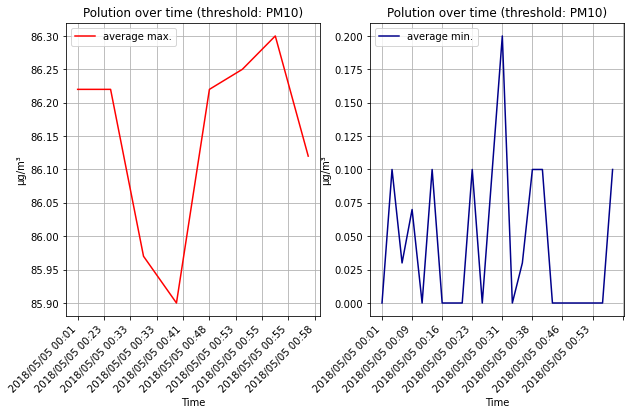

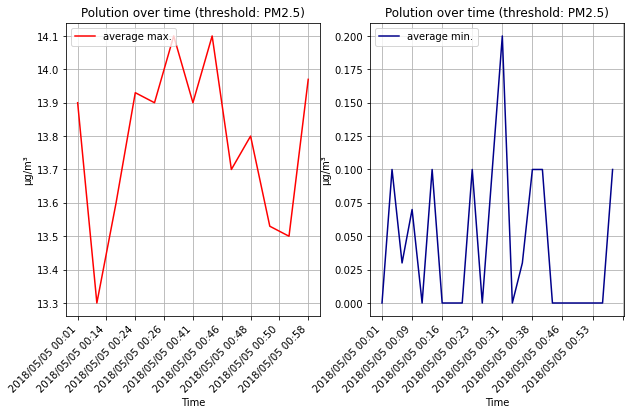

In [46]:
plot_average_pol(df)

In [1]:
pip install ipynb

  Using cached ipynb-0.5.1-py3-none-any.whl (6.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [35]:
pd.to_datetime(df['time']).dt.strftime("%Y/%m/%d %H:%M")

0        2018/05/05 00:00
1        2018/05/05 00:00
2        2018/05/05 00:00
3        2018/05/05 00:00
4        2018/05/05 00:00
               ...       
28617    2018/05/05 00:59
28618    2018/05/05 00:59
28619    2018/05/05 00:59
28620    2018/05/05 00:59
28621    2018/05/05 00:59
Name: time, Length: 28405, dtype: object